# Exercise 1.1
Load an image and compute the full SVD.
-  A. Choose a rank $r< m$ and comfirm that the matrix $U^*U$ is the $r\times r$ identity matrix.
-  B. Confirm that $UU^*$ is *not* the identity matrix.
-  C. Comptue the norm of the error between $UU^*$ and the $n\times n$ identity matrix as the rank $r$ varies from $1$ to $n$ and plot the error. 

## 📝 Prelimnary Notes

- $U\in\mathbb{R}^{m\times m}$ is an orthonormal matrix and its columns are called the **left singular vectors** of $X$.
    - The first $r$ columns of $U$, $\{\bold{u}_1, \bold{u}_2, \dots, \bold{u}_r\}$ form an orthonormal basis for $\text{Col}(X)$.
    - The remaining $m-r$ columns of $U$, $\{\bold{u}_{r+1}, \bold{u}_{r+2}, \dots, \bold{u}_m\}$ form an orthonormal basis for $\text{Null}(A^T)$.
- $\Sigma\in\mathbb{R}^{m\times n}$ has the structure $$_m \Sigma_n = \begin{bmatrix} _r\tilde{\Sigma}_r & _r \bm{0}_{n-r} \\ _{m-r} \bm{0}_{r} & _{m-r} \bm{0}_{n-r} \end{bmatrix}$$ where $\tilde{\Sigma}$ is a diagonal matrix whose entries are called **singular values** of $X$ and appear in decreasing order (i.e., $\sigma_1 \ge \sigma_2 \ge \dots \ge \sigma_r$). 
- $V\in\mathbb{R}^{n\times n}$ is an orthonormal matrix and its columns are called the **right singular vectors** of $X$.
    - The first $r$ columns of $V$, $\{ \bold{v}_1, \bold{v}_2, \dots, \bold{v}_r \}$ form an orthonormal basis for $\text{Row}(X)$.
    - The remaining $n-r$ columns of $V$, $\{ \bold{v}_{r+1}, \bold{v}_{r+2}, \dots, \bold{v}_n \}$ form an orthonormal basis for $\text{Null}(A)$

Big Ideas:
- $U$ and $V$ are both orthonormal matrices $\therefore U^{-1}=U^T$ and $V^{-1}=V^T$ 

---
- 📜 [Linear Algebra Cheat Sheet 2](https://lshriver-portfolio.replit.app/static/pdfs/notes/cheatsheets/linear_algebra_cheatsheet_part2.pdf)
- 📜 [Prof Won Math | Lecture 20 | Singular Value Decomposition Basics](https://lshriver-portfolio.replit.app/static/pdfs/notes/prof_won_math/singular_value_decomposition.pdf)

## Load an image and compute the full SVD

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.display import display, Latex, Math

# Load the image
image = '/workspaces/steve-brunton-book/data/dog.jpg' 
A = imread(image)
X = np.mean(A, -1)  # Convert to grayscale

m, n = X.shape
print("Image shape: ", X.shape)

# Take the SVD
U, S, Vh = np.linalg.svd(X, full_matrices=True)
V = Vh.conj().T

Sigma = np.zeros((m, n))
np.fill_diagonal(Sigma, S)

print(f"Image shape:  {X.shape}")
print(f"U shape:      {U.shape}")
print(f"Sigma shape:  {Sigma.shape}")
print(f"V shape:      {V.shape}")
print(f"Rank:       {np.linalg.matrix_rank(X)}")

Image shape:  (2000, 1500)
Image shape:  (2000, 1500)
U shape:      (2000, 2000)
Sigma shape:  (2000, 1500)
V shape:      (1500, 1500)
Rank:       1500


## Part A
Choose a rank $r<m$ and confirm that the matrix $U^*U$ is the $r\times r$ identity matrix.

In [18]:
import random
from IPython.display import display, Latex

#r = random.randint(1, X.shape[0])   # Choose a random rank
r = np.linalg.matrix_rank(X)  # Choose a fixed rank
print(f"Chosen Rank:        {r}")

# Truncated U (only the first r columns -- i.e., an orthonormal basis for Col(X))
U_r = U[:, :r]
print(f"U_r shape:   {U_r.shape}")

# Compute U_r^* * U_r
I_r_approx = np.dot(U_r.conj().T, U_r)
print(f"I_r_approx shape:   {I_r_approx.shape}")

# Check the difference from the idenity
error_I_r_approx = np.linalg.norm(I_r_approx - np.eye(r))
print(f"Error from identity: {error_I_r_approx}")

# Check if error is close enough to zero
if error_I_r_approx < 0.99:
    display(Latex(r"✅ $U_r^* U_r$ is close to the identity matrix."))
else:
    display(Latex(r"❌ $U_r^* U_r$ is NOT close to the identity matrix."))

Chosen Rank:        748
U_r shape:   (1000, 748)
I_r_approx shape:   (748, 748)
Error from identity: 7.173123026526376e-06


<IPython.core.display.Latex object>

## Part B
Confirm that $UU^*$ is *not* an approximation of the identity matrix.

P shape:      (1000, 1000)
Error from identity: 15.874507918450755


<IPython.core.display.Latex object>

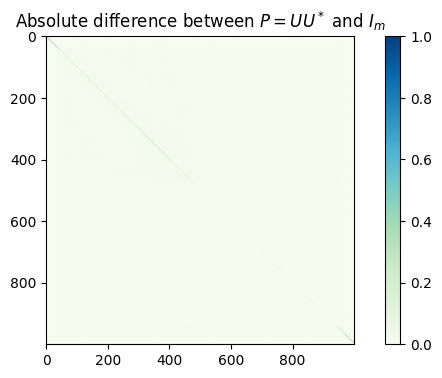

In [ ]:
# Compute the projection matrix
P = np.dot(U_r, U_r.conj().T)
print(f"P shape:      {P.shape}")

# Compare P to the mxm identity matrix
error_P = np.linalg.norm(P - np.eye(m))
print(f"Error from identity: {error_P}")

# Check if error is close enoug:
    display(Latex(r"✅ $P$ is close to the identity matrix."))
else:
    display(Latex(r"❌ $P$ is NOT close to the identity matrix."))

plt.figure(figsize=(8, 4))
plt.imshow(np.abs(P - np.eye(m)), cmap='GnBu')

plt.colorbar()
plt.title(r"Absolute difference between $P=UU^*$ and $I_m$");

### Visualization Results
Recall: $U_r=\begin{bmatrix} \bold{u}_1 & \bold{u}_2 & \dots & \bold{u}_r \end{bmatrix}$. 
- These are the first $r$ columns of matrix $U$ and are orthonormal. Therefore, 
    1. $U_r^*U_r=I_r$
    2. $U_rU_r^*$ is a projection onto the $r$-dimensional subspace spanned by the columns of $U_r$. 
- Note that $\text{Col}(X) = \text{span}(\{\bold{u}_1, \bold{u}_2, \dots, \bold{u}_r \})$.
- A projection matrix, behaves like the identity on the subspace it projects onto, but not necessarily the entire space. I.e., if $P=U_rU_r^*$, then ...
    - Let $\bold{u}_i \in \text{Col}(X)$. Then $P\bold{u}_i=\bold{u}_i$.
    - Let $\bold{u}_i^\perp \in \text{Null}(X^\perp)$ (i.e., let $\bold{u}_i^\perp$ be in left nullspace of $X$ -- note that the left nullspace of $X$ is orthogonal to $\text{Col}(A)$). Then $P\bold{u}_i^\perp = \bold{0}$. 

Since the projection matrix $P=U_rU_r^*$ is only guaranteed to act as an identity on $\text{Col}(X)$, if $U_r \in \mathbb{C}^{m\times r}$ with $r<m$, then $P$ will differ from the full $m\times m$ identity matrix on the parts of the vector space outside that $r$-dimensional subspace. This is why the error $$\| P-I_m  \| \neq 0 .$$
Thus, when we say "$P$ is a projection (i.e., only acting as identity on the column space of $U_r$) and hence the error is nonzero", it means:
- $P=U_rU_r^*$ is the identity only for vectors within the $r$-dimensional column space of $U_r$.
- For vectors outside that space, $P$ does not reproduce those vectors, so the overall difference $P-I_m$, when (e.g., using a norm over the entire space), is nonzero.

## Part C
Compute the norm of the error between $UU^*$ and the $n\times n$ identity matrix as the rank $r$ varies from $1$ to $m$ and plot the error.

Image shape:  (1000, 1000)


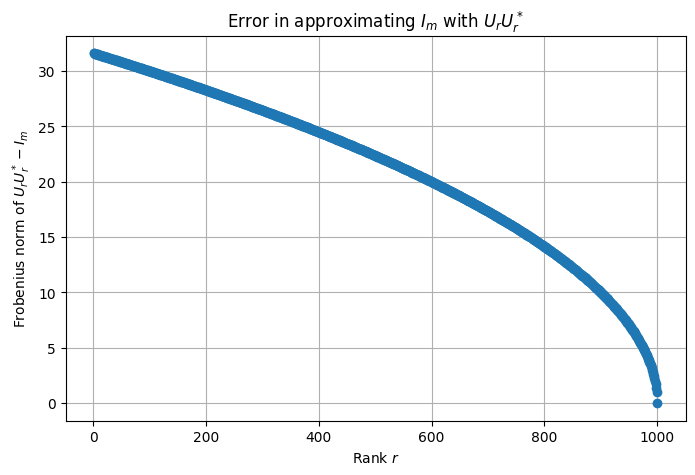

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
from IPython.display import display, Latex, Math

A - imread(image)
if A.ndim == 3:
    A = np.mean(A, axis=2)  # Convert to grayscale
m, n = A.shape
print("Image shape: ", A.shape)

# Compute the full SVD: note that for an m x n matrix, U is m x m, s contains min(m,n) singular values, and Vh is n x n
U, s, Vh = np.linalg.svd(A, full_matrices=True)
V = Vh.conj().T

errors = []
r_vals = range(1, m+1)  # Loop over ranks
for r in r_vals:
    U_r = U[:, :r]  # Get the first r left singular vectors (r x m)
    P_u = np.dot(U_r, U_r.conj().T)  # Compute the projection matrix (n x n)
    I_m = np.eye(m)
    err = np.linalg.norm(P_u - I_m, ord='fro')  # Frobenius norm
    errors.append(err)  # Store the error

# Plot the error vs. r
plt.figure(figsize=(8, 5))
plt.plot(r_vals, errors, 'o')
plt.xlabel(r"Rank $r$")
plt.ylabel(r"Frobenius norm of $U_r U_r^* - I_m$")
plt.title(r"Error in approximating $I_m$ with $U_r U_r^*$")
plt.grid(True)
plt.show()